In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
import gmaps
# Google developer API key
from config import gkey
from datetime import date
# Configure gmaps
gmaps.configure(api_key=gkey)
from pprint import pprint
import itertools
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.stats as stats

In [36]:
#data provided by emily and harlan https://github.com/NABSA/gbfs/blob/master/systems.csv
census_df=pd.read_csv("acs2017_county_data.csv")
del census_df['Hispanic']
del census_df['White']
del census_df['Black']
del census_df['Native']
del census_df['Asian']
del census_df['Pacific']
del census_df['Professional']
list(census_df.columns)
census_df['Service'].values

array([18. , 18.2, 16.8, ..., 21.2, 26. , 20.2])

In [59]:
census_df.loc[census_df['County']=="Pasquotank County"]

,CountyId,State,County,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1959,37139,North Carolina,Pasquotank County,39546,19203,20343,30066,47264,1826,23714,...,2.3,2.1,3.0,28.3,16333,71.5,23.3,5.1,0.1,7.0


In [39]:
w = census_df['Walk']
w

0       0.6
1       0.8
2       2.2
3       0.3
4       0.4
       ... 
3215    1.4
3216    5.0
3217    2.1
3218    1.4
3219    1.7
Name: Walk, Length: 3220, dtype: float64

In [40]:
c = census_df['County']
c

0            Autauga County
1            Baldwin County
2            Barbour County
3               Bibb County
4             Blount County
               ...         
3215    Vega Baja Municipio
3216      Vieques Municipio
3217     Villalba Municipio
3218      Yabucoa Municipio
3219        Yauco Municipio
Name: County, Length: 3220, dtype: object

In [118]:
wc = list(zip(c,w))
wc

[('Autauga County', 0.6),
 ('Baldwin County', 0.8),
 ('Barbour County', 2.2),
 ('Bibb County', 0.3),
 ('Blount County', 0.4),
 ('Bullock County', 6.2),
 ('Butler County', 0.9),
 ('Calhoun County', 1.3),
 ('Chambers County', 0.6),
 ('Cherokee County', 0.3),
 ('Chilton County', 0.6),
 ('Choctaw County', 1.7),
 ('Clarke County', 0.7),
 ('Clay County', 2.8),
 ('Cleburne County', 0.9),
 ('Coffee County', 1.0),
 ('Colbert County', 0.7),
 ('Conecuh County', 0.8),
 ('Coosa County', 1.7),
 ('Covington County', 1.1),
 ('Crenshaw County', 1.7),
 ('Cullman County', 0.6),
 ('Dale County', 2.1),
 ('Dallas County', 1.7),
 ('DeKalb County', 0.9),
 ('Elmore County', 0.6),
 ('Escambia County', 0.3),
 ('Etowah County', 0.6),
 ('Fayette County', 1.3),
 ('Franklin County', 0.2),
 ('Geneva County', 0.6),
 ('Greene County', 1.1),
 ('Hale County', 0.3),
 ('Henry County', 0.7),
 ('Houston County', 0.7),
 ('Jackson County', 1.3),
 ('Jefferson County', 1.4),
 ('Lamar County', 0.2),
 ('Lauderdale County', 1.7),
 

In [136]:
county = random.choices(wc, k=50)


In [154]:
new_df = list(zip(*county))

# list(new_df)
final_df = pd.DataFrame(new_df)
final_df = final_df.T

# final_df['County'] = pd.DataFrame(new_df[0])
# final_df['Mean Walk']=new_df[1]
final_df
# unzipped_list_df = pd.DataFrame(list(df))
# unzipped_list_df
# cw_df = unzipped_list_df.T
# cw_df
# cw_df['County']=cw_df[0]
# cw_df['Mean Walk']=cw_df[1]
# del cw_df[0]
# del cw_df[1]
# # unzipped_list['Walk']=unzipped_list[1]
# # unzipped_list




,0,1
0,Henry County,2.8
1,Bon Homme County,5.1
2,Escambia County,0.3
3,Saline County,1.8
4,Crockett County,0.9
5,Charleston County,2.9
6,Wilson County,0.7
7,Muskingum County,2.3
8,Fairfield County,1.2
9,Anderson County,0.8


In [174]:
county_list = final_df[0]
county = county_list.sort_values(ascending = True, inplace = False)
county
# walk = final_df[1]

45               Allen County
9             Anderson County
36               Anoka County
21           Armstrong County
18              Becker County
1            Bon Homme County
5           Charleston County
12           Chattooga County
28              Clarke County
4             Crockett County
29           Currituck County
33             Dauphin County
31              Elmore County
2             Escambia County
8            Fairfield County
49              Fisher County
10            Franklin County
13                Gila County
0                Henry County
30             Houston County
35                Iowa County
37               Jones County
23           Keya Paha County
43               Logan County
27             Loudoun County
46               Lucas County
42              Marion County
20            McDowell County
11            McKinley County
40            Mitchell County
19          Montgomery County
44            Muscogee County
7            Muskingum County
38        

In [157]:
walk

0      2.8
1      5.1
2      0.3
3      1.8
4      0.9
5      2.9
6      0.7
7      2.3
8      1.2
9      0.8
10     4.3
11     3.7
12     2.2
13     2.8
14     0.5
15     1.4
16     0.8
17     1.2
18     3.2
19       4
20     0.7
21     2.5
22     1.5
23     7.7
24     2.5
25     1.8
26     5.8
27     1.7
28     1.7
29     1.8
30     3.1
31     0.6
32     0.9
33     3.5
34     0.2
35     3.6
36       1
37     3.8
38     0.7
39       3
40     2.2
41    10.1
42     2.1
43     1.3
44     1.3
45     1.6
46     2.1
47     1.6
48     1.1
49     3.3
Name: 1, dtype: object

In [106]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# # not assume equal population variance
# stats.ttest_ind(walk, county, equal_var=False)

<function matplotlib.pyplot.show(*args, **kw)>

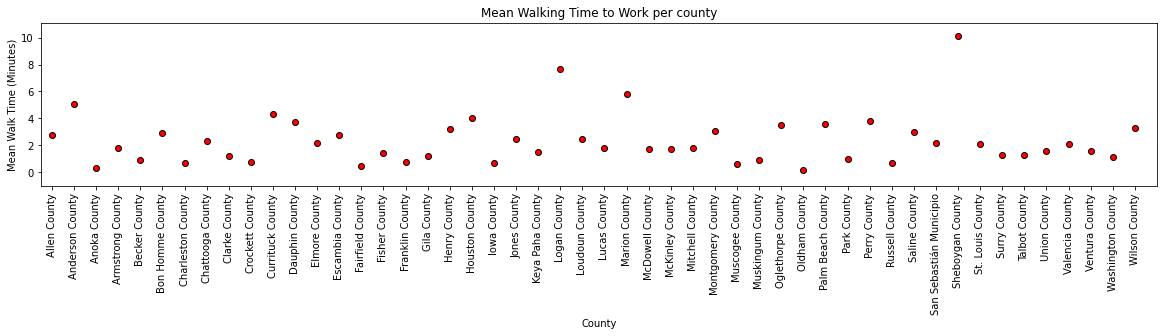

In [176]:
fig = plt.figure(figsize=(20,3))
plt.scatter(county, walk, marker="o", facecolors="red", edgecolors="black")
plt.xlim(-0.5, len(county))
plt.ylim(-1, max(walk)+1)
x_axis = np.arange(len(county))
tick_locations = [value for value in x_axis]
plt.title("Mean Walking Time to Work per county")
plt.xlabel("County")
plt.ylabel("Mean Walk Time (Minutes)")
plt.xticks(tick_locations, county, rotation="vertical")
fig.savefig('mean_walk_county.png',bbox_inches='tight')
plt.show

Text(0, 0.5, 'Mean Walk Time (Minutes))')

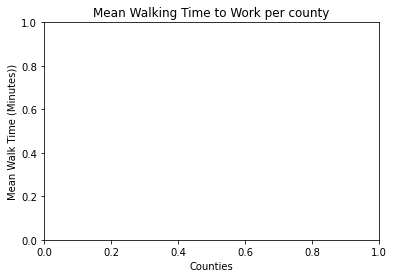

In [50]:
max(w)

59.2

In [8]:
#getting latitudes and longitudes for city as well as coordinates of bird scooters in each cities
# coord_length=[]
# lat_list=[]
# lon_list=[]
# all_url=data_scoot["Auto-Discovery URL"]
# # type(all_url)
# data_json = []
# city_list = []
# x = 0

# for i, row in data_scoot.iterrows():
    
#     # print(base_url)
#     base_url= row['Auto-Discovery URL']
#     cities = row['Location']
#     print(f'running record {x} on {cities}')
    
#     data = requests.get(base_url).json()
#     #print(data)
#     target_url=data["data"]["en"]["feeds"][3]["url"]
#     #target_url
#     data_coord=requests.get(target_url).json()
#     data_geofence = (data_coord["data"]["geofencing_zones"][0])
#     data_json.append(data_geofence)
#     city_list.append(cities)
#     x = x+1
    


running record 0 on Alexandria, VA
running record 1 on Chicago, IL
running record 2 on Cleveland, OH
running record 3 on Columbus, OH
running record 4 on Culver City, CA
running record 5 on Detroit, MI
running record 6 on Fairfax, VA
running record 7 on Indianapolis,IN
running record 8 on Kansas City, MO
running record 9 on Los Angeles, CA
running record 10 on Louisville, KY
running record 11 on Portland, OR
running record 12 on San Francisco, CA
running record 13 on Tempe, AZ
running record 14 on Washington, DC


In [19]:
lat_list = []
lon_list = []
base_url= "https://mds.bird.co/gbfs/washington-dc/gbfs.json"
city = "Washington DC"
data = requests.get(base_url).json()
base_url1=data["data"]["en"]["feeds"][2]["url"]
result1 = requests.get(base_url1).json()
bike_coord = result1['data']['bikes']
print(f'There are {len(bike_coord)} bikes in {city}.')
for bike in bike_coord:
        
        # Add Lat info to list
        lat_list.append([bike][0]['lat'])
        lon_list.append([bike][0]['lon'])

There are 677 bikes in Washington DC.


In [20]:
city_bird_df = pd.DataFrame({'Lat':lat_list, 'Lon': lon_list})
city_bird_df['Operator'] = "Bird"
today = date.today()
city_bird_df['Date'] = today
city_bird_df.to_csv('WashingtonDC_Bird_Lat_Lon.csv')

In [6]:
# #To create city level dataframe
# df = pd.DataFrame(data_json)
# df["City"] = city_list
# df["Operator"] = "Bird"
# df


In [5]:
# #to get counts by operator manually
# count_list = []
# count_list.append(len(df["zone_area"][0]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][1]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][2]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][3]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][4]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][5]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][6]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][7]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][8]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][9]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][10]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][11]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][12]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][13]["coordinates"][0][0]))
# count_list.append(len(df["zone_area"][14]["coordinates"][0][0]))


In [7]:
# #To add city level count to df
# df["Count"] = count_list
# df

In [9]:
# #second and cleaner method
# zone_area = []
# for x in data_json:
#     zone_area.append(x['zone_area'])

# coord_list = []
# for x in zone_area:
#     coord_list.append(x["coordinates"][0][0])

# flat_list = list(itertools.chain(*coord_list))

# lat_list = []
# lon_list = []
# for x in flat_list:
#     lat_list.append(x[1])
#     lon_list.append(x[0])

In [8]:
# #Confirmed work -first method
# with open('bird_geofence.json', 'w') as json_file:
#     json.dump(data_json, json_file)

In [9]:
# #Confirmed work -first method
# # Open the existing json file for loading into a variable
# with open('bird_geofence.json', 'r') as f:
#   geo_fence = json.load(f)

# zone_area = []
# # Print each property of the object
# for x in geo_fence:
#   zone_area.append(x['zone_area'])

In [10]:
# #Confirmed work -first method
# with open('bird_zone_area.json', 'w') as json_file:
#     json.dump(zone_area, json_file)

In [11]:
# #Confirmed work -first method
# # Open the existing json file for loading into a variable
# with open('bird_zone_area.json', 'r') as f:
#   zone_area = json.load(f)

# coord_list = []

# # Print each property of the object
# for x in zone_area:  
#   coord_list.append(x["coordinates"][0][0])

In [12]:
# #Confirmed work -first method
# coord_list


# flat_list = list(itertools.chain(*coord_list))

# lat_list = []
# lon_list = []
# for x in flat_list:
#     lat_list.append(x[1])
#     lon_list.append(x[0])
# # print(len(coord_list))
# # for x in range[0:14]
# #     coord_list[x]
# #     coord_list[1]

# # for x in coord_list:
# #     coord_pairs = x[0]

# # coord_pairs

# # # for x in coord_pairs:
# # #     coord = x

# coord

In [9]:
geocleaned_df = pd.DataFrame({'Lat':lat_list, 'Lon': lon_list})
geocleaned_df['Operator'] = "Bird"
today = date.today()
geocleaned_df['Date'] = today
geocleaned_df
# geocleaned_df.to_csv('Geocode_Bird_Lat_Lon.csv')

,Lat,Lon,Operator,Date
0,38.994739,-77.041154,Bird,2021-05-17
1,38.994739,-77.041154,Bird,2021-05-17
2,38.893812,-76.909382,Bird,2021-05-17
3,38.799691,-77.028859,Bird,2021-05-17
4,38.827513,-77.030919,Bird,2021-05-17
5,38.854518,-77.021445,Bird,2021-05-17
6,38.871379,-77.040773,Bird,2021-05-17
7,38.875434,-77.045917,Bird,2021-05-17
8,38.885538,-77.056881,Bird,2021-05-17
9,38.888427,-77.060174,Bird,2021-05-17


In [102]:
#To save city level data to csv
# del df['geofencing_zone_id']
# del df['zone_area']
# df.rename(columns={'lat':'Lat', 'lon':'Lon'})
# df
# today = date.today()
# df['Date'] = today
# df
# df.to_csv('Bird_Lat_Lon.csv')

In [13]:


locations = list(zip(lat_list,lon_list))
locations



[(38.8410750557452, -77.0462917608619),
 (38.8404843680438, -77.0462132610711),
 (38.8404245554607, -77.0460353857972),
 (38.840014430543, -77.0458505729493),
 (38.8399816806208, -77.0460900103779),
 (38.8400817432697, -77.0464075109622),
 (38.8398865554896, -77.046506260789),
 (38.8396533679068, -77.0463002607689),
 (38.8395464305486, -77.0463094483482),
 (38.8389936178968, -77.0459098858054),
 (38.8387387425184, -77.0453988849437),
 (38.8384763052012, -77.0452707602149),
 (38.8381488047956, -77.0454354475582),
 (38.837797054927, -77.0454180106066),
 (38.8377273676733, -77.0453316357469),
 (38.8372303051062, -77.0453275730008),
 (38.8365146175192, -77.0451981354177),
 (38.8360828670702, -77.0450313852634),
 (38.8359139924492, -77.0451471350874),
 (38.8357794923006, -77.0450410726087),
 (38.8354234919065, -77.0450096349421),
 (38.8344794918108, -77.0447303226027),
 (38.8338003045673, -77.0444351348313),
 (38.833530616655, -77.0441737595344),
 (38.8335227418627, -77.0439773222803),
 (38

In [90]:
# locations = df[['lat','lon']]
# locations
# count = df["Count"]
# count

0     324
1     606
2      38
3      73
4      75
5      57
6      36
7     224
8     224
9      75
10     10
11     91
12      7
13    164
14     26
Name: Count, dtype: int64

In [15]:

#generating the heat map using the city(lat and lon values) with
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating = False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))